#Basic classification: Classify images of clothing

###https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = df.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

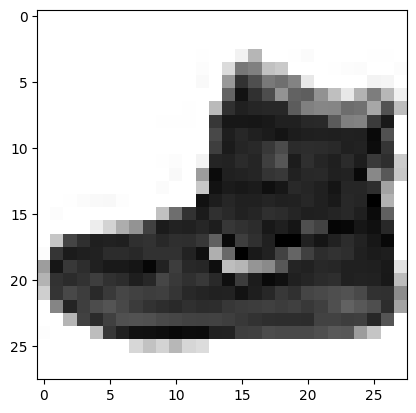

In [ ]:
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4928 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3741 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3356 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3097 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2932 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2796 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2676 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2472 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8855


In [ ]:
print(test_acc)

0.8855000138282776


In [ ]:
 prediction = model.predict(test_images)
 print(class_names[np.argmax(prediction[0])])

313/313 [==============================] - 1s 2ms/step
Ankle boot


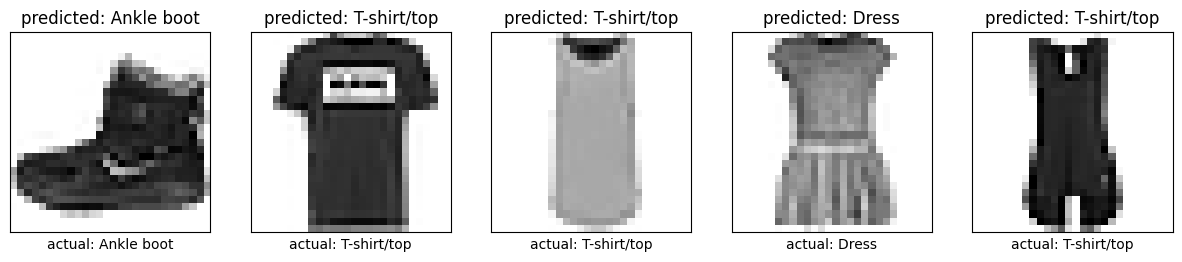

In [ ]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel("actual: " + class_names[train_labels[i]])
    plt.title("predicted: " + class_names[train_labels[i]])
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

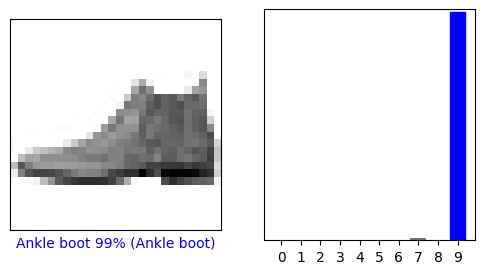

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

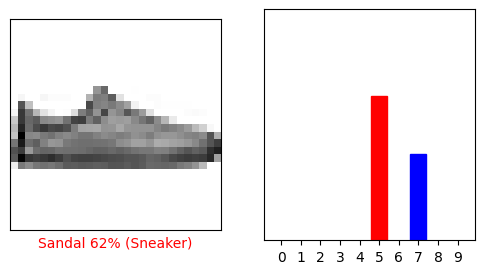

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

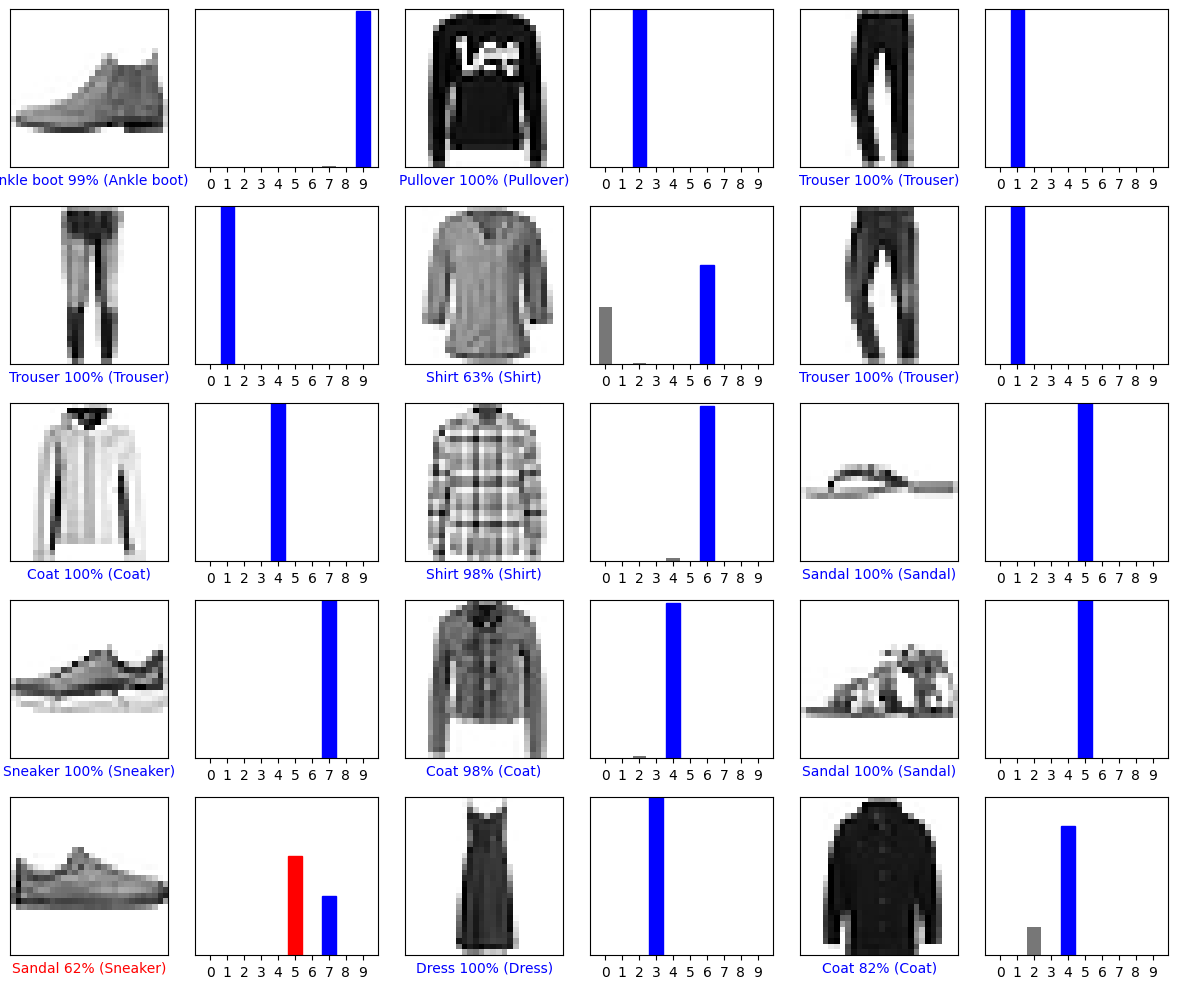

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()